## Explicação
    
    - Dados obtidos por imagens digitalizadas de massa mamária, que descrevem
    características dos núcleos celulares presentes na imagem
    
    - Dado um dataset com dados sobre cancer de mama, analisar de o tumor será
    benigno ou maligno
    
    explicação das colunas:
        diagnosis: diagnóstico -> B = benigno, M = maligno
        radius - raio da célula
        texture - desvio padrão de valores da escala cinza
        perimeter - perimetro da celula
        area - area da celula
        smoothness - variação local no tamanho do raio
        compacteness - perimetro^2 / area - 1
        concavity - quao ruim está as porções concavas do contorno
        concave points - quantidade de porcções concavas no contorno
        simmetry - simetria
        
        The mean, standard error and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features. For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
        
        
        

#### Selecionamento de dados

    - Como se trata de uma doença com muita variação, todos os outliers serão
    considerados válidos, visto que limitando a um intervalo corre um risco de 
    enviesamento dos dados

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

cancer_dataset = pd.read_csv('data_cancer2.csv')
cancer_dataset.shape

(569, 33)

In [136]:
cancer_dataset.dtypes  # Verificação dos tipos de dados presentes no dataset

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [137]:
cancer_dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [138]:
worst_columns = [x for x in cancer_dataset.columns if 'worst' in x]
benign = cancer_dataset[cancer_dataset['diagnosis'] == 'B']
malign = cancer_dataset[cancer_dataset['diagnosis'] == 'M']

# grande difenreça entre concavity_worst, concave points_worst e symmetry_worst
display(benign)
display(malign)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,NaN
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,NaN
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,NaN
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,NaN
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,NaN
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,NaN
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,NaN


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,NaN


In [139]:
dataset = cancer_dataset[cancer_dataset.columns[1:12].append(cancer_dataset.columns[28:31])]
dataset = dataset.drop_duplicates()
dataset.to_csv("treated_cancer.csv")
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,concavity_worst,concave points_worst,symmetry_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,0.7119,0.2654,0.4601
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.2416,0.1860,0.2750
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.4504,0.2430,0.3613
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.6869,0.2575,0.6638
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,0.4107,0.2216,0.2060
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.3215,0.1628,0.2572
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.3403,0.1418,0.2218
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.9387,0.2650,0.4087


In [140]:
# Sem valores nulos
dataset.isnull().sum()

diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
concavity_worst           0
concave points_worst      0
symmetry_worst            0
dtype: int64

#### Pré processamento dos dados

    - Sem variáveis categóricas --> não tem necessidade de usar
    variáveis dummies

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np


# Substituição do diagnóstico entre 1 e 0, sendo 0 benigno e 1 maligno
dataset['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
alvo = dataset['diagnosis']

parametros = dataset.drop('diagnosis', axis=1)  # parametros normal

C:\Users\yujio\AppData\Local\Temp/ipykernel_13476/2557339931.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)
C:\Users\yujio\AppData\Local\Temp/ipykernel_13476/2557339931.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['diag

##### Análise da correlação dos parâmetros
    - Como o raio, perimetro, area e concave points_mean tiveram uma alta correlação
    foi optador por reduzir os parâmetros deixando apenas o raio.

<IPython.core.display.Javascript object>


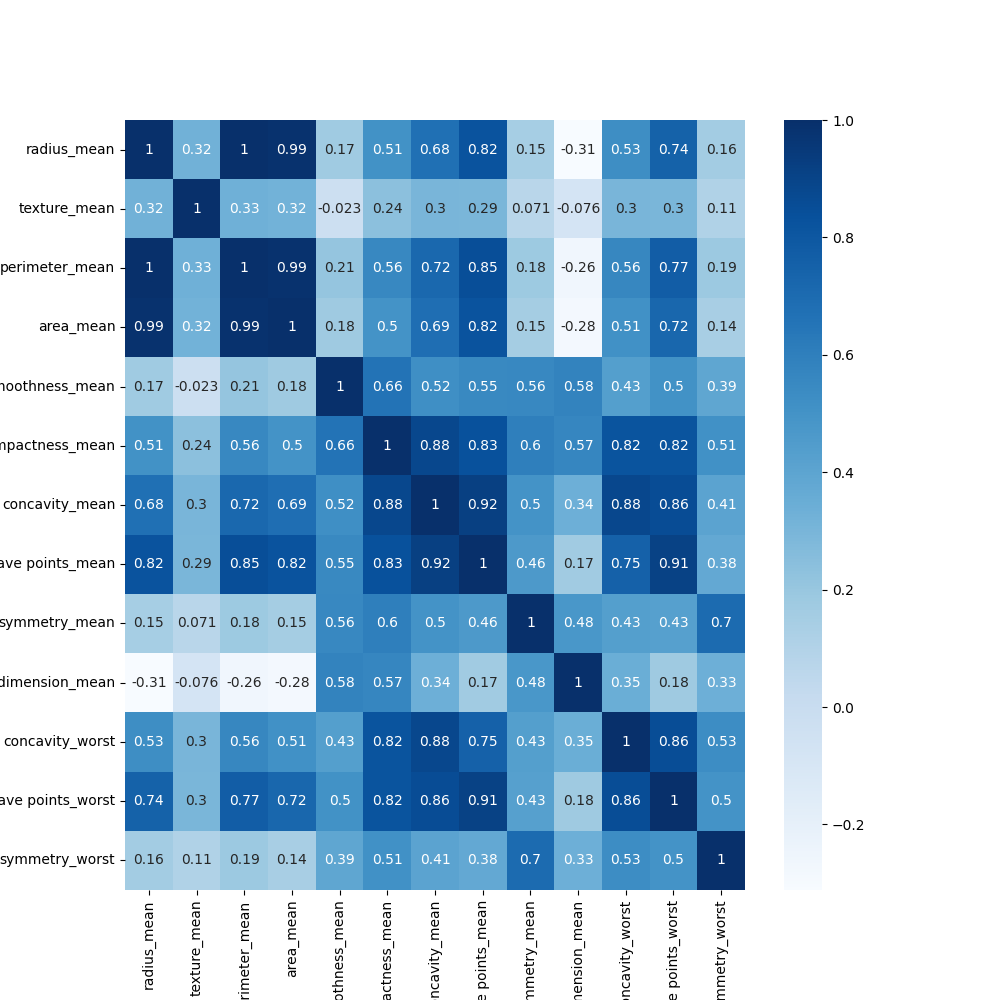

<Axes: >

In [142]:
plt.figure(figsize=(10, 10))
sns.heatmap(parametros.corr(), annot=True, cmap='Blues')

In [143]:
high_corr_columns = ['perimeter_mean', 'area_mean', 'concave points_mean', 'concave points_worst']
parametros = parametros.drop(high_corr_columns, axis=1)
parametros_esc = StandardScaler().fit_transform(parametros)  # parametros escalonados/normalizados
parametros_pca = PCA(n_components=5).fit_transform(parametros) # parametros com apenas 5 colunas

##### Modelo Naive Bayes

In [144]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros, alvo)

naive = GaussianNB()
naive.fit(x_train, y_train)
result = naive.predict(x_test)
kfold = KFold(n_splits=30, shuffle=True)
cross_result = cross_val_score(naive, parametros, alvo, cv=kfold)


print(f"Resultado treino:\n{classification_report(y_train, naive.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")

Resultado treino:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       269
           1       0.91      0.86      0.88       157

    accuracy                           0.92       426
   macro avg       0.91      0.90      0.91       426
weighted avg       0.92      0.92      0.92       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        88
           1       0.89      0.89      0.89        55

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

Média da validação cruzada: 0.9120857699805067


##### SVM

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros_esc, alvo)

svm = SVC(C=2, kernel='linear')
svm.fit(x_train, y_train)

result = svm.predict(x_test)
cross_result = cross_val_score(svm, parametros_esc, alvo, cv=kfold)

print(f"Resultado treino:\n{classification_report(y_train, svm.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")

Resultado treino:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       269
           1       0.98      0.96      0.97       157

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.98      0.93      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Média da validação cruzada: 0.96130604288499


##### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros_esc, alvo)

linear = LogisticRegression(max_iter=50, tol=0.0001, solver='liblinear', penalty='l2', C=5)
linear.fit(x_train, y_train)

result = linear.predict(x_test)
cross_result = cross_val_score(linear, parametros_esc, alvo, cv=kfold)

print(f"Resultado treino:\n{classification_report(y_train, linear.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")


Resultado treino:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       269
           1       0.98      0.96      0.97       157

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        88
           1       0.98      0.93      0.95        55

    accuracy                           0.97       143
   macro avg       0.97      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143

Média da validação cruzada: 0.9648148148148147


##### KNN

In [147]:
import warnings
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.neighbors._classification")

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros_esc, alvo)

knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1, weights='uniform', leaf_size=20)
knn.fit(x_train, y_train)
result = knn.predict(x_test)
cross_result = cross_val_score(knn, parametros_esc, alvo, cv=kfold)

print(f"Resultado treino:\n{classification_report(y_train, knn.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")


Resultado treino:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       269
           1       0.95      0.92      0.94       157

    accuracy                           0.95       426
   macro avg       0.95      0.95      0.95       426
weighted avg       0.95      0.95      0.95       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        88
           1       0.93      0.93      0.93        55

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

Média da validação cruzada: 0.9490253411306041


##### Decision tree

In [148]:
from sklearn.tree import DecisionTreeClassifier

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros, alvo)

tree = DecisionTreeClassifier(criterion='gini', max_depth=5, max_features="log2", random_state=0,
                              splitter='best',
                             )
tree.fit(x_train, y_train)
result = tree.predict(x_test)

cross_result = cross_val_score(tree, parametros, alvo, cv=kfold)

print(f"Resultado treino:\n{classification_report(y_train, tree.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")

Resultado treino:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       269
           1       0.96      0.97      0.96       157

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        88
           1       0.92      0.89      0.91        55

    accuracy                           0.93       143
   macro avg       0.93      0.92      0.93       143
weighted avg       0.93      0.93      0.93       143

Média da validação cruzada: 0.8910331384015594


##### Random Forest

In [149]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros, alvo)

forest = RandomForestClassifier(n_estimators=35, criterion='gini', max_depth=8, random_state=0,
                               max_leaf_nodes=10)
forest.fit(x_train, y_train)
result = forest.predict(x_test)

cross_result = cross_val_score(forest, parametros, alvo, cv=kfold)

print(f"Resultado treino:\n{classification_report(y_train, forest.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")

Resultado treino:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       269
           1       0.97      0.96      0.97       157

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92        88
           1       0.86      0.91      0.88        55

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143

Média da validação cruzada: 0.9436647173489278


##### XGBoost

In [150]:
from xgboost import XGBClassifier

np.random.seed(5)

x_train, x_test, y_train, y_test = train_test_split(parametros, alvo)
xg = XGBClassifier(n_estimators=60, learning_rate=0.03, random_state=0,
                  max_depth=3, objective='binary:logistic')
xg.fit(x_train, y_train)
result = xg.predict(x_test)

cross_result = cross_val_score(xg, parametros, alvo, cv=kfold)
print(f"Resultado treino:\n{classification_report(y_train, xg.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")

Resultado treino:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       269
           1       0.98      0.97      0.97       157

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        88
           1       0.88      0.93      0.90        55

    accuracy                           0.92       143
   macro avg       0.92      0.92      0.92       143
weighted avg       0.92      0.92      0.92       143

Média da validação cruzada: 0.9347953216374268


##### Catboost

In [151]:
from catboost import CatBoostClassifier

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros, alvo)

categorical_variable = ['diagnosis']

cat = CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.25, depth=5, random_state=0,
                         eval_metric="Accuracy"
                        )
cat.fit(x_train, y_train, plot=False, eval_set=(x_test, y_test))
result = cat.predict(x_test)

cross_result = cross_val_score(cat, parametros, alvo, cv=kfold)
print(f"Resultado treino:\n{classification_report(y_train, cat.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")


0:	learn: 0.9154930	test: 0.8951049	best: 0.8951049 (0)	total: 2.1ms	remaining: 208ms
1:	learn: 0.9366197	test: 0.9090909	best: 0.9090909 (1)	total: 3.54ms	remaining: 174ms
2:	learn: 0.9530516	test: 0.9090909	best: 0.9090909 (1)	total: 5.15ms	remaining: 167ms
3:	learn: 0.9507042	test: 0.9020979	best: 0.9090909 (1)	total: 6.52ms	remaining: 156ms
4:	learn: 0.9530516	test: 0.9020979	best: 0.9090909 (1)	total: 7.93ms	remaining: 151ms
5:	learn: 0.9553991	test: 0.9020979	best: 0.9090909 (1)	total: 9.13ms	remaining: 143ms
6:	learn: 0.9647887	test: 0.9160839	best: 0.9160839 (6)	total: 10.2ms	remaining: 135ms
7:	learn: 0.9694836	test: 0.9300699	best: 0.9300699 (7)	total: 11.2ms	remaining: 129ms
8:	learn: 0.9577465	test: 0.9300699	best: 0.9300699 (7)	total: 12.5ms	remaining: 126ms
9:	learn: 0.9600939	test: 0.9300699	best: 0.9300699 (7)	total: 13.7ms	remaining: 123ms
10:	learn: 0.9647887	test: 0.9370629	best: 0.9370629 (10)	total: 15.1ms	remaining: 122ms
11:	learn: 0.9624413	test: 0.9440559	best:

18:	learn: 0.9709091	total: 19.2ms	remaining: 82ms
19:	learn: 0.9727273	total: 20.5ms	remaining: 82ms
20:	learn: 0.9727273	total: 21.6ms	remaining: 81.1ms
21:	learn: 0.9727273	total: 22.5ms	remaining: 79.8ms
22:	learn: 0.9781818	total: 23.7ms	remaining: 79.2ms
23:	learn: 0.9763636	total: 24.7ms	remaining: 78.3ms
24:	learn: 0.9781818	total: 25.9ms	remaining: 77.7ms
25:	learn: 0.9781818	total: 27ms	remaining: 76.9ms
26:	learn: 0.9800000	total: 28.1ms	remaining: 75.9ms
27:	learn: 0.9800000	total: 29.2ms	remaining: 75ms
28:	learn: 0.9800000	total: 30.3ms	remaining: 74.3ms
29:	learn: 0.9800000	total: 31.4ms	remaining: 73.3ms
30:	learn: 0.9818182	total: 32.7ms	remaining: 72.7ms
31:	learn: 0.9818182	total: 33.6ms	remaining: 71.4ms
32:	learn: 0.9818182	total: 34.5ms	remaining: 70ms
33:	learn: 0.9781818	total: 35.4ms	remaining: 68.6ms
34:	learn: 0.9800000	total: 36.6ms	remaining: 67.9ms
35:	learn: 0.9800000	total: 37.6ms	remaining: 66.9ms
36:	learn: 0.9818182	total: 38.8ms	remaining: 66.1ms
37:

38:	learn: 0.9872727	total: 45.9ms	remaining: 71.9ms
39:	learn: 0.9890909	total: 47.3ms	remaining: 70.9ms
40:	learn: 0.9890909	total: 48.8ms	remaining: 70.3ms
41:	learn: 0.9890909	total: 50.4ms	remaining: 69.6ms
42:	learn: 0.9890909	total: 52.3ms	remaining: 69.4ms
43:	learn: 0.9890909	total: 53.6ms	remaining: 68.2ms
44:	learn: 0.9890909	total: 55.1ms	remaining: 67.4ms
45:	learn: 0.9927273	total: 56.2ms	remaining: 66ms
46:	learn: 0.9927273	total: 57.4ms	remaining: 64.8ms
47:	learn: 0.9909091	total: 61ms	remaining: 66.1ms
48:	learn: 0.9909091	total: 70.8ms	remaining: 73.7ms
49:	learn: 0.9909091	total: 72ms	remaining: 72ms
50:	learn: 0.9909091	total: 74.8ms	remaining: 71.8ms
51:	learn: 0.9909091	total: 76.2ms	remaining: 70.4ms
52:	learn: 0.9909091	total: 78.4ms	remaining: 69.5ms
53:	learn: 0.9909091	total: 79.6ms	remaining: 67.8ms
54:	learn: 0.9909091	total: 81ms	remaining: 66.3ms
55:	learn: 0.9909091	total: 82.1ms	remaining: 64.5ms
56:	learn: 0.9909091	total: 83.5ms	remaining: 63ms
57:	l

3:	learn: 0.9509091	total: 4.33ms	remaining: 104ms
4:	learn: 0.9490909	total: 5.42ms	remaining: 103ms
5:	learn: 0.9545455	total: 6.33ms	remaining: 99.2ms
6:	learn: 0.9563636	total: 7.29ms	remaining: 96.9ms
7:	learn: 0.9563636	total: 8.3ms	remaining: 95.5ms
8:	learn: 0.9600000	total: 9.26ms	remaining: 93.6ms
9:	learn: 0.9600000	total: 10.2ms	remaining: 92.1ms
10:	learn: 0.9600000	total: 11.3ms	remaining: 91.3ms
11:	learn: 0.9600000	total: 12.2ms	remaining: 89.8ms
12:	learn: 0.9618182	total: 13.3ms	remaining: 89ms
13:	learn: 0.9636364	total: 14.4ms	remaining: 88.5ms
14:	learn: 0.9672727	total: 15.5ms	remaining: 88ms
15:	learn: 0.9672727	total: 16.5ms	remaining: 86.4ms
16:	learn: 0.9672727	total: 17.4ms	remaining: 84.9ms
17:	learn: 0.9690909	total: 18.3ms	remaining: 83.5ms
18:	learn: 0.9690909	total: 19.3ms	remaining: 82.2ms
19:	learn: 0.9727273	total: 20.2ms	remaining: 80.9ms
20:	learn: 0.9745455	total: 21.1ms	remaining: 79.5ms
21:	learn: 0.9745455	total: 22ms	remaining: 78.1ms
22:	learn

10:	learn: 0.9618182	total: 13ms	remaining: 105ms
11:	learn: 0.9636364	total: 14.2ms	remaining: 104ms
12:	learn: 0.9654545	total: 15.4ms	remaining: 103ms
13:	learn: 0.9709091	total: 16.5ms	remaining: 101ms
14:	learn: 0.9690909	total: 17.5ms	remaining: 99.4ms
15:	learn: 0.9690909	total: 19ms	remaining: 99.8ms
16:	learn: 0.9690909	total: 20.1ms	remaining: 98ms
17:	learn: 0.9727273	total: 21.1ms	remaining: 96.2ms
18:	learn: 0.9709091	total: 22.3ms	remaining: 95ms
19:	learn: 0.9745455	total: 23.5ms	remaining: 94ms
20:	learn: 0.9745455	total: 24.7ms	remaining: 93ms
21:	learn: 0.9727273	total: 25.7ms	remaining: 91.1ms
22:	learn: 0.9763636	total: 26.6ms	remaining: 89.1ms
23:	learn: 0.9781818	total: 27.7ms	remaining: 87.8ms
24:	learn: 0.9781818	total: 28.7ms	remaining: 86ms
25:	learn: 0.9800000	total: 29.6ms	remaining: 84.3ms
26:	learn: 0.9818182	total: 30.5ms	remaining: 82.5ms
27:	learn: 0.9836364	total: 31.4ms	remaining: 80.7ms
28:	learn: 0.9836364	total: 32.3ms	remaining: 79.1ms
29:	learn: 

3:	learn: 0.9509091	total: 4.36ms	remaining: 105ms
4:	learn: 0.9490909	total: 5.46ms	remaining: 104ms
5:	learn: 0.9636364	total: 6.54ms	remaining: 103ms
6:	learn: 0.9654545	total: 7.72ms	remaining: 103ms
7:	learn: 0.9672727	total: 8.71ms	remaining: 100ms
8:	learn: 0.9654545	total: 9.91ms	remaining: 100ms
9:	learn: 0.9672727	total: 10.9ms	remaining: 97.9ms
10:	learn: 0.9709091	total: 11.9ms	remaining: 96.6ms
11:	learn: 0.9690909	total: 12.9ms	remaining: 94.6ms
12:	learn: 0.9727273	total: 14ms	remaining: 93.7ms
13:	learn: 0.9727273	total: 15ms	remaining: 92.4ms
14:	learn: 0.9727273	total: 16ms	remaining: 90.9ms
15:	learn: 0.9745455	total: 17ms	remaining: 89.1ms
16:	learn: 0.9727273	total: 17.9ms	remaining: 87.4ms
17:	learn: 0.9727273	total: 19ms	remaining: 86.4ms
18:	learn: 0.9745455	total: 19.9ms	remaining: 85ms
19:	learn: 0.9745455	total: 20.8ms	remaining: 83.3ms
20:	learn: 0.9763636	total: 21.8ms	remaining: 81.9ms
21:	learn: 0.9745455	total: 22.8ms	remaining: 80.7ms
22:	learn: 0.97454

3:	learn: 0.9345455	total: 4.88ms	remaining: 117ms
4:	learn: 0.9436364	total: 6.13ms	remaining: 117ms
5:	learn: 0.9527273	total: 7.32ms	remaining: 115ms
6:	learn: 0.9527273	total: 8.35ms	remaining: 111ms
7:	learn: 0.9509091	total: 9.36ms	remaining: 108ms
8:	learn: 0.9636364	total: 10.4ms	remaining: 105ms
9:	learn: 0.9618182	total: 11.4ms	remaining: 102ms
10:	learn: 0.9618182	total: 12.5ms	remaining: 102ms
11:	learn: 0.9636364	total: 13.6ms	remaining: 99.9ms
12:	learn: 0.9654545	total: 14.7ms	remaining: 98.6ms
13:	learn: 0.9690909	total: 15.8ms	remaining: 96.9ms
14:	learn: 0.9672727	total: 16.7ms	remaining: 94.9ms
15:	learn: 0.9690909	total: 17.7ms	remaining: 93.1ms
16:	learn: 0.9690909	total: 18.7ms	remaining: 91.5ms
17:	learn: 0.9727273	total: 19.8ms	remaining: 90.1ms
18:	learn: 0.9745455	total: 20.7ms	remaining: 88.4ms
19:	learn: 0.9745455	total: 21.7ms	remaining: 86.9ms
20:	learn: 0.9709091	total: 22.7ms	remaining: 85.3ms
21:	learn: 0.9709091	total: 23.6ms	remaining: 83.7ms
22:	lear

1:	learn: 0.9327273	total: 2.33ms	remaining: 114ms
2:	learn: 0.9363636	total: 3.51ms	remaining: 114ms
3:	learn: 0.9381818	total: 4.54ms	remaining: 109ms
4:	learn: 0.9418182	total: 5.49ms	remaining: 104ms
5:	learn: 0.9472727	total: 6.58ms	remaining: 103ms
6:	learn: 0.9545455	total: 7.63ms	remaining: 101ms
7:	learn: 0.9600000	total: 8.59ms	remaining: 98.8ms
8:	learn: 0.9563636	total: 9.66ms	remaining: 97.6ms
9:	learn: 0.9563636	total: 10.6ms	remaining: 95.7ms
10:	learn: 0.9563636	total: 11.7ms	remaining: 94.3ms
11:	learn: 0.9600000	total: 12.6ms	remaining: 92.7ms
12:	learn: 0.9636364	total: 13.7ms	remaining: 91.7ms
13:	learn: 0.9672727	total: 14.7ms	remaining: 90.1ms
14:	learn: 0.9654545	total: 15.6ms	remaining: 88.5ms
15:	learn: 0.9709091	total: 16.5ms	remaining: 86.8ms
16:	learn: 0.9709091	total: 17.5ms	remaining: 85.3ms
17:	learn: 0.9727273	total: 18.4ms	remaining: 84ms
18:	learn: 0.9690909	total: 19.4ms	remaining: 82.9ms
19:	learn: 0.9709091	total: 20.3ms	remaining: 81.4ms
20:	learn:

21:	learn: 0.9690909	total: 26.4ms	remaining: 93.5ms
22:	learn: 0.9727273	total: 27.8ms	remaining: 93ms
23:	learn: 0.9727273	total: 28.8ms	remaining: 91.1ms
24:	learn: 0.9727273	total: 29.7ms	remaining: 89.1ms
25:	learn: 0.9745455	total: 30.9ms	remaining: 88ms
26:	learn: 0.9727273	total: 32ms	remaining: 86.6ms
27:	learn: 0.9781818	total: 33.5ms	remaining: 86.1ms
28:	learn: 0.9781818	total: 34.6ms	remaining: 84.6ms
29:	learn: 0.9781818	total: 35.6ms	remaining: 83ms
30:	learn: 0.9800000	total: 36.6ms	remaining: 81.4ms
31:	learn: 0.9763636	total: 37.7ms	remaining: 80.2ms
32:	learn: 0.9781818	total: 38.8ms	remaining: 78.7ms
33:	learn: 0.9818182	total: 40ms	remaining: 77.6ms
34:	learn: 0.9818182	total: 40.9ms	remaining: 76ms
35:	learn: 0.9818182	total: 41.9ms	remaining: 74.5ms
36:	learn: 0.9818182	total: 43.1ms	remaining: 73.3ms
37:	learn: 0.9818182	total: 44.3ms	remaining: 72.2ms
38:	learn: 0.9818182	total: 45.7ms	remaining: 71.5ms
39:	learn: 0.9818182	total: 46.7ms	remaining: 70.1ms
40:	l

89:	learn: 0.9890909	total: 103ms	remaining: 11.5ms
90:	learn: 0.9909091	total: 105ms	remaining: 10.3ms
91:	learn: 0.9909091	total: 106ms	remaining: 9.19ms
92:	learn: 0.9909091	total: 107ms	remaining: 8.03ms
93:	learn: 0.9909091	total: 108ms	remaining: 6.87ms
94:	learn: 0.9909091	total: 109ms	remaining: 5.71ms
95:	learn: 0.9909091	total: 110ms	remaining: 4.58ms
96:	learn: 0.9927273	total: 111ms	remaining: 3.43ms
97:	learn: 0.9927273	total: 122ms	remaining: 2.5ms
98:	learn: 0.9927273	total: 124ms	remaining: 1.25ms
99:	learn: 0.9927273	total: 126ms	remaining: 0us
0:	learn: 0.9272727	total: 1.08ms	remaining: 107ms
1:	learn: 0.9381818	total: 2.12ms	remaining: 104ms
2:	learn: 0.9381818	total: 3.14ms	remaining: 101ms
3:	learn: 0.9400000	total: 4.19ms	remaining: 101ms
4:	learn: 0.9527273	total: 5.14ms	remaining: 97.6ms
5:	learn: 0.9618182	total: 6.07ms	remaining: 95ms
6:	learn: 0.9618182	total: 7.07ms	remaining: 94ms
7:	learn: 0.9690909	total: 8ms	remaining: 92ms
8:	learn: 0.9709091	total: 9.

1:	learn: 0.9400000	total: 2.66ms	remaining: 130ms
2:	learn: 0.9381818	total: 3.91ms	remaining: 126ms
3:	learn: 0.9472727	total: 4.93ms	remaining: 118ms
4:	learn: 0.9472727	total: 6.11ms	remaining: 116ms
5:	learn: 0.9545455	total: 7.29ms	remaining: 114ms
6:	learn: 0.9581818	total: 8.42ms	remaining: 112ms
7:	learn: 0.9581818	total: 9.45ms	remaining: 109ms
8:	learn: 0.9563636	total: 10.4ms	remaining: 105ms
9:	learn: 0.9654545	total: 11.6ms	remaining: 104ms
10:	learn: 0.9618182	total: 12.7ms	remaining: 103ms
11:	learn: 0.9636364	total: 13.7ms	remaining: 101ms
12:	learn: 0.9690909	total: 15.5ms	remaining: 104ms
13:	learn: 0.9654545	total: 16.5ms	remaining: 101ms
14:	learn: 0.9654545	total: 17.4ms	remaining: 98.8ms
15:	learn: 0.9690909	total: 18.5ms	remaining: 96.9ms
16:	learn: 0.9690909	total: 19.4ms	remaining: 95ms
17:	learn: 0.9745455	total: 20.4ms	remaining: 92.8ms
18:	learn: 0.9727273	total: 21.3ms	remaining: 90.6ms
19:	learn: 0.9745455	total: 22.2ms	remaining: 88.7ms
20:	learn: 0.9781

1:	learn: 0.9381818	total: 2.26ms	remaining: 111ms
2:	learn: 0.9381818	total: 3.31ms	remaining: 107ms
3:	learn: 0.9345455	total: 4.34ms	remaining: 104ms
4:	learn: 0.9472727	total: 5.52ms	remaining: 105ms
5:	learn: 0.9600000	total: 6.48ms	remaining: 102ms
6:	learn: 0.9600000	total: 7.47ms	remaining: 99.2ms
7:	learn: 0.9563636	total: 8.43ms	remaining: 97ms
8:	learn: 0.9654545	total: 9.49ms	remaining: 95.9ms
9:	learn: 0.9618182	total: 10.6ms	remaining: 95.6ms
10:	learn: 0.9672727	total: 11.7ms	remaining: 94.3ms
11:	learn: 0.9654545	total: 12.8ms	remaining: 93.7ms
12:	learn: 0.9672727	total: 14ms	remaining: 93.8ms
13:	learn: 0.9636364	total: 15.1ms	remaining: 92.5ms
14:	learn: 0.9672727	total: 16ms	remaining: 90.9ms
15:	learn: 0.9690909	total: 17.2ms	remaining: 90.2ms
16:	learn: 0.9690909	total: 18.2ms	remaining: 88.7ms
17:	learn: 0.9709091	total: 19.2ms	remaining: 87.3ms
18:	learn: 0.9690909	total: 20.1ms	remaining: 85.6ms
19:	learn: 0.9727273	total: 21ms	remaining: 84.2ms
20:	learn: 0.97

13:	learn: 0.9654545	total: 17.5ms	remaining: 108ms
14:	learn: 0.9636364	total: 18.7ms	remaining: 106ms
15:	learn: 0.9672727	total: 19.9ms	remaining: 105ms
16:	learn: 0.9672727	total: 21.3ms	remaining: 104ms
17:	learn: 0.9690909	total: 22.4ms	remaining: 102ms
18:	learn: 0.9709091	total: 23.5ms	remaining: 100ms
19:	learn: 0.9709091	total: 24.7ms	remaining: 98.7ms
20:	learn: 0.9745455	total: 25.7ms	remaining: 96.8ms
21:	learn: 0.9745455	total: 27.2ms	remaining: 96.4ms
22:	learn: 0.9745455	total: 28.4ms	remaining: 95.2ms
23:	learn: 0.9727273	total: 29.6ms	remaining: 93.8ms
24:	learn: 0.9763636	total: 30.7ms	remaining: 92ms
25:	learn: 0.9800000	total: 31.8ms	remaining: 90.4ms
26:	learn: 0.9818182	total: 33ms	remaining: 89.3ms
27:	learn: 0.9854545	total: 34.1ms	remaining: 87.6ms
28:	learn: 0.9854545	total: 35.1ms	remaining: 85.8ms
29:	learn: 0.9854545	total: 36.2ms	remaining: 84.4ms
30:	learn: 0.9854545	total: 37.3ms	remaining: 83.1ms
31:	learn: 0.9854545	total: 38.6ms	remaining: 82.1ms
32:

95:	learn: 0.9945455	total: 97.6ms	remaining: 4.06ms
96:	learn: 0.9945455	total: 98.7ms	remaining: 3.05ms
97:	learn: 0.9963636	total: 100ms	remaining: 2.04ms
98:	learn: 0.9963636	total: 101ms	remaining: 1.02ms
99:	learn: 0.9963636	total: 102ms	remaining: 0us
0:	learn: 0.9090909	total: 1.11ms	remaining: 110ms
1:	learn: 0.9345455	total: 2.5ms	remaining: 123ms
2:	learn: 0.9418182	total: 3.83ms	remaining: 124ms
3:	learn: 0.9454545	total: 5.3ms	remaining: 127ms
4:	learn: 0.9509091	total: 6.36ms	remaining: 121ms
5:	learn: 0.9563636	total: 7.3ms	remaining: 114ms
6:	learn: 0.9509091	total: 8.32ms	remaining: 111ms
7:	learn: 0.9563636	total: 9.52ms	remaining: 109ms
8:	learn: 0.9600000	total: 10.7ms	remaining: 108ms
9:	learn: 0.9636364	total: 12.2ms	remaining: 110ms
10:	learn: 0.9618182	total: 13.2ms	remaining: 107ms
11:	learn: 0.9600000	total: 14.6ms	remaining: 107ms
12:	learn: 0.9618182	total: 16ms	remaining: 107ms
13:	learn: 0.9636364	total: 17.6ms	remaining: 108ms
14:	learn: 0.9654545	total: 

1:	learn: 0.9381818	total: 2.38ms	remaining: 116ms
2:	learn: 0.9418182	total: 3.86ms	remaining: 125ms
3:	learn: 0.9509091	total: 4.86ms	remaining: 117ms
4:	learn: 0.9527273	total: 5.83ms	remaining: 111ms
5:	learn: 0.9563636	total: 6.9ms	remaining: 108ms
6:	learn: 0.9563636	total: 7.84ms	remaining: 104ms
7:	learn: 0.9563636	total: 8.79ms	remaining: 101ms
8:	learn: 0.9581818	total: 9.97ms	remaining: 101ms
9:	learn: 0.9636364	total: 11.1ms	remaining: 99.7ms
10:	learn: 0.9636364	total: 12.2ms	remaining: 98.7ms
11:	learn: 0.9654545	total: 13.2ms	remaining: 96.9ms
12:	learn: 0.9636364	total: 14.4ms	remaining: 96.3ms
13:	learn: 0.9672727	total: 15.3ms	remaining: 94.2ms
14:	learn: 0.9654545	total: 16.3ms	remaining: 92.4ms
15:	learn: 0.9654545	total: 17.4ms	remaining: 91.1ms
16:	learn: 0.9690909	total: 18.5ms	remaining: 90.3ms
17:	learn: 0.9727273	total: 19.5ms	remaining: 89.1ms
18:	learn: 0.9727273	total: 20.5ms	remaining: 87.4ms
19:	learn: 0.9745455	total: 21.4ms	remaining: 85.6ms
20:	learn: 

1:	learn: 0.9345455	total: 2.44ms	remaining: 120ms
2:	learn: 0.9363636	total: 3.62ms	remaining: 117ms
3:	learn: 0.9363636	total: 4.57ms	remaining: 110ms
4:	learn: 0.9436364	total: 5.51ms	remaining: 105ms
5:	learn: 0.9509091	total: 6.45ms	remaining: 101ms
6:	learn: 0.9454545	total: 7.34ms	remaining: 97.5ms
7:	learn: 0.9545455	total: 8.28ms	remaining: 95.3ms
8:	learn: 0.9563636	total: 9.31ms	remaining: 94.1ms
9:	learn: 0.9581818	total: 10.3ms	remaining: 93ms
10:	learn: 0.9600000	total: 11.3ms	remaining: 91.7ms
11:	learn: 0.9672727	total: 12.3ms	remaining: 90.1ms
12:	learn: 0.9654545	total: 13.3ms	remaining: 88.8ms
13:	learn: 0.9636364	total: 14.4ms	remaining: 88.2ms
14:	learn: 0.9654545	total: 15.4ms	remaining: 87.5ms
15:	learn: 0.9672727	total: 16.7ms	remaining: 87.5ms
16:	learn: 0.9654545	total: 17.6ms	remaining: 86.2ms
17:	learn: 0.9690909	total: 18.6ms	remaining: 84.7ms
18:	learn: 0.9727273	total: 19.5ms	remaining: 83.3ms
19:	learn: 0.9727273	total: 20.4ms	remaining: 81.8ms
20:	learn

#### Análise dos modelos
    
    Naive bayes - 91.2%, parametros normais
    
    SVM = 96.1%, SVC(C=2, kernel='linear'), parametros escalonados
    
    Logistic regression - 96.4%, LogisticRegression(max_iter=50, tol=0.0001, solver='liblinear', penalty='l2', C=5) , parametros escalonados
    
    KNN - 94.9%, KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=1, weights='uniform', leaf_size=20), parametros escalonados
    
    Decision tree - 89,1%, DecisionTreeClassifier(criterion='gini', max_depth=5, max_features="log2", random_state=0, splitter='best'), parametros normais
    
    Random forest - 94.73, RandomForestClassifier(n_estimators=35, criterion='gini', max_depth=8, random_state=0, max_leaf_nodes=10), parametros normais
    
    XGboost - 93.4%, XGBClassifier(n_estimators=60, learning_rate=0.03, random_state=0, max_depth=3, objective='binary:logistic'), parametros normais
    
    Catboost - 95.7%, CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.25, depth=5, random_state=0, eval_metric="Accuracy"), parametros normais


Dessa forma o modelo escolhido será o Logistic regression, que apresentou melhores resultados além de não apresentar indicios de overfitting
    

#### Análise de como as colunas estão afetando o modelo
    - A coluna da média de simétria e a média da dimensão fractal não estão exercendo
    tanto impacto no modelo, elas serão retiradas para teste a fim de reduzir a 
    quantidade de parametros necessárias no modelo
    
    - Como não houve mudanças quanto ao resultado do modelo, essas colunas serão excluidas
    

<IPython.core.display.Javascript object>


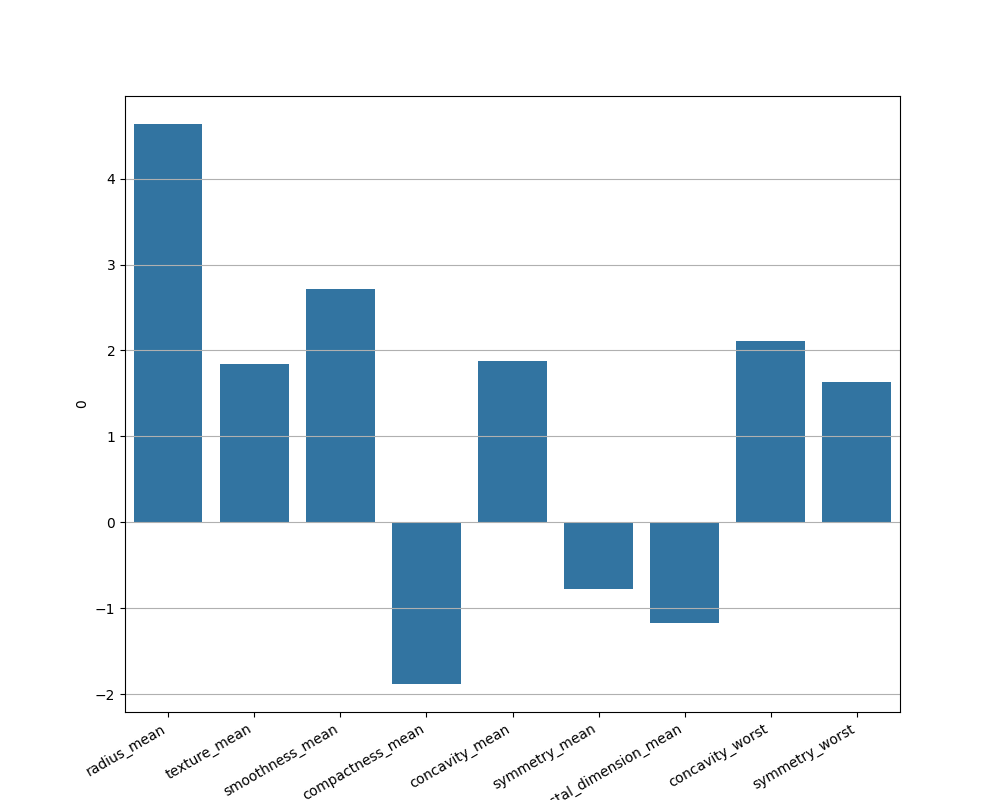

<Axes: ylabel='0'>

In [152]:
important_features = pd.DataFrame(linear.coef_[0], parametros.columns)

plt.figure(figsize=(10, 8))
plt.grid()
plt.xticks(rotation=30, ha='right')
sns.barplot(important_features[0])

In [153]:
parametros = parametros.drop(['symmetry_mean', 'fractal_dimension_mean'], axis=1)
scaler = StandardScaler()
parametros_esc = scaler.fit_transform(parametros)  # parametros escalonados/normalizados

np.random.seed(5)
x_train, x_test, y_train, y_test = train_test_split(parametros_esc, alvo)

linear = LogisticRegression(max_iter=50, tol=0.0001, solver='liblinear', penalty='l2', C=5)
linear.fit(x_train, y_train)

result = linear.predict(x_test)
cross_result = cross_val_score(linear, parametros_esc, alvo, cv=kfold)

print(f"Resultado treino:\n{classification_report(y_train, linear.predict(x_train))}")
print("-" * 50)
print("Resultado teste:\n", classification_report(y_test, result))
print(f"Média da validação cruzada: {cross_result.mean()}")

Resultado treino:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       269
           1       0.97      0.94      0.96       157

    accuracy                           0.97       426
   macro avg       0.97      0.96      0.97       426
weighted avg       0.97      0.97      0.97       426

--------------------------------------------------
Resultado teste:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.98      0.95      0.96        55

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

Média da validação cruzada: 0.9648148148148146


In [154]:
parametros

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concavity_worst,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.7119,0.4601
1,20.57,17.77,0.08474,0.07864,0.08690,0.2416,0.2750
2,19.69,21.25,0.10960,0.15990,0.19740,0.4504,0.3613
3,11.42,20.38,0.14250,0.28390,0.24140,0.6869,0.6638
4,20.29,14.34,0.10030,0.13280,0.19800,0.4000,0.2364
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.4107,0.2060
565,20.13,28.25,0.09780,0.10340,0.14400,0.3215,0.2572
566,16.60,28.08,0.08455,0.10230,0.09251,0.3403,0.2218
567,20.60,29.33,0.11780,0.27700,0.35140,0.9387,0.4087


In [155]:
import joblib


alvo.to_csv("diagnosis.csv")
parametros.to_csv("parametros.csv")
pd.DataFrame(parametros_esc, columns=parametros.columns).to_csv("parametros_esc.csv")
joblib.dump(linear, 'cancerLogistic.joblib')
joblib.dump(scaler, 'scaler.pkl')



['scaler.pkl']

In [156]:
parametros

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concavity_worst,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.7119,0.4601
1,20.57,17.77,0.08474,0.07864,0.08690,0.2416,0.2750
2,19.69,21.25,0.10960,0.15990,0.19740,0.4504,0.3613
3,11.42,20.38,0.14250,0.28390,0.24140,0.6869,0.6638
4,20.29,14.34,0.10030,0.13280,0.19800,0.4000,0.2364
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.4107,0.2060
565,20.13,28.25,0.09780,0.10340,0.14400,0.3215,0.2572
566,16.60,28.08,0.08455,0.10230,0.09251,0.3403,0.2218
567,20.60,29.33,0.11780,0.27700,0.35140,0.9387,0.4087


In [157]:
parametros

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concavity_worst,symmetry_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.7119,0.4601
1,20.57,17.77,0.08474,0.07864,0.08690,0.2416,0.2750
2,19.69,21.25,0.10960,0.15990,0.19740,0.4504,0.3613
3,11.42,20.38,0.14250,0.28390,0.24140,0.6869,0.6638
4,20.29,14.34,0.10030,0.13280,0.19800,0.4000,0.2364
...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.4107,0.2060
565,20.13,28.25,0.09780,0.10340,0.14400,0.3215,0.2572
566,16.60,28.08,0.08455,0.10230,0.09251,0.3403,0.2218
567,20.60,29.33,0.11780,0.27700,0.35140,0.9387,0.4087
